In [4]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

%matplotlib inline

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
#df

values = df.T.mean(axis=0)
std = df.T.std(axis=0)
conf95 = std/math.sqrt(sampSize) * stats.t.ppf(1-.05/2, degFree)
# print(values)
# print(std)
confRange92 = [values.iloc[0]+conf95.iloc[0], values.iloc[0]-conf95.iloc[0]]
confRange93 = [values.iloc[1]+conf95.iloc[1], values.iloc[1]-conf95.iloc[1]]
confRange94 = [values.iloc[2]+conf95.iloc[2], values.iloc[2]-conf95.iloc[2]]
confRange95 = [values.iloc[3]+conf95.iloc[3], values.iloc[3]-conf95.iloc[3]]
myRanges = [confRange92, confRange93, confRange94, confRange95]


Please enter y value to check against ->: 42000


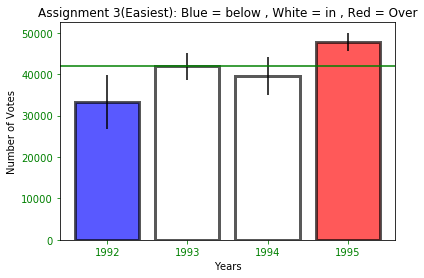

In [8]:
userInp = int(input('Please enter y value to check against ->: '))
colors = ['Blue', 'White', 'Red']
y_pos = np.arange(4)
years = ["1992","1993","1994","1995"]
sampSize = df.shape[1]
degFree = df.shape[1]-1
fig, ax = plt.subplots()
ax.set_xticks(y_pos)
ax.set_xticklabels(years)
ax.set_xlabel("Years")
ax.set_ylabel("Number of Votes")
ax.set_title("Assignment 3(Easiest): Blue = below , White = in , Red = Over")
ax.tick_params(axis="y", colors = "green")
ax.tick_params(axis="x", colors = "green")
ax.axhline(y = userInp, color ='g')

barColors = []
for confRange in myRanges:
    if confRange[1] > userInp:
        barColors.append('red')
    elif confRange[0] < userInp:
        barColors.append('blue')
    else:
        barColors.append('white')

myData = ax.bar(y_pos, values, yerr=conf95, alpha = .65, edgecolor ='black', linewidth = 3, color = barColors)
plt.show()
